In [161]:
%%capture
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

Before creating any models, we should clean the data, perform exploratory data analysis, and any feature engineering that will be required for use in the final model.

## Initial exploration


First, print out a sample of the data. 


In [14]:
df = pd.read_csv('SDG_startups.csv')
df.head()


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,funded
0,6ef7fe43-c72e-6770-2ced-7632cf1c0a2e,Traxtuff,organization,traxtuff,https://www.crunchbase.com/organization/traxtuff,2892920.0,2008-05-08 05:47:29,2018-02-12 23:30:11,NaN,company,...,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,0
1,31bbf410-9d73-7399-5d99-fd1cd965a2c5,Viridus,organization,viridus,https://www.crunchbase.com/organization/viridus,1637395.0,2008-05-19 18:55:33,2019-06-24 22:20:57,NaN,company,...,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,0
2,8d2ad84e-8da1-502e-d4f8-e0c5d9a48ca8,Eco Logisca,organization,eco-logisca,https://www.crunchbase.com/organization/eco-lo...,2528781.0,2008-06-29 21:42:15,2019-06-24 22:09:34,NaN,"investor,company",...,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,0
3,4f035308-054b-f068-edf9-ce684a7c254c,Imara Corporation,organization,imara-corporation,https://www.crunchbase.com/organization/imara-...,1361171.0,2008-07-03 11:38:57,2019-06-24 21:58:48,NaN,company,...,http://www.facebook.com/pages/silicon-valleysa...,http://www.linkedin.com/company/san-jose-silic...,http://twitter.com/svbizjournal,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,0
4,0aba9427-134a-229d-3b7c-46cd478031eb,EcoFlip,organization,ecoflip,https://www.crunchbase.com/organization/ecoflip,1975159.0,2008-07-11 23:59:44,2022-05-13 03:49:44,NaN,company,...,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN,0


Next, since df.head() cuts some columns off, lets look at each column and some other important info -- type, # of null, etc. 

**_NOTE:_** If viewing on GitHub, you may need to download/run the file and view as a text editor)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         4912 non-null   object 
 1   name                         4912 non-null   object 
 2   type                         4912 non-null   object 
 3   permalink                    4912 non-null   object 
 4   cb_url                       4912 non-null   object 
 5   rank                         4905 non-null   float64
 6   created_at                   4912 non-null   object 
 7   updated_at                   4912 non-null   object 
 8   legal_name                   1666 non-null   object 
 9   roles                        4894 non-null   object 
 10  domain                       4430 non-null   object 
 11  homepage_url                 4430 non-null   object 
 12  country_code                 4414 non-null   object 
 13  state_code        

There are some columns that are not entirely self-explanatory as to what values they can take on, so lets explore for those cases.

In [12]:
cols_to_explore = [
    'type',
    'country_code',
    'roles',
    'category_list',
    'category_groups_list',
    'employee_count',
    'primary_role'
]

for col in cols_to_explore:
    print(f'Count of unique values for column "{col}": {len(df[col].unique())}')
    print(f'Unique values for column "{col}": {df[col].unique()}\n')

Count of unique values for column "type": 1
Unique values for column "type": ['organization']

Count of unique values for column "country_code": 116
Unique values for column "country_code": ['ISR' 'USA' 'AUT' 'AUS' 'CAN' nan 'FIN' 'GBR' 'SWE' 'CHN' 'KOR' 'ESP'
 'BRA' 'ITA' 'IRL' 'RUS' 'NZL' 'ARE' 'KEN' 'IND' 'TWN' 'CHE' 'DNK' 'NLD'
 'ZAF' 'TUR' 'GRC' 'PAK' 'LBN' 'AZE' 'LSO' 'PHL' 'FRA' 'IDN' 'BEL' 'DEU'
 'MEX' 'SGP' 'PAN' 'NOR' 'NGA' 'MYS' 'NAM' 'ROM' 'EST' 'UGA' 'COL' 'ARG'
 'HUN' 'POL' 'CIV' 'ZWE' 'JPN' 'PRT' 'TAN' 'ARM' 'PER' 'GTM' 'CHL' 'THA'
 'MLI' 'GHA' 'SAU' 'MOZ' 'IMN' 'MUS' 'MMR' 'SRB' 'HND' 'SLV' 'IRN' 'EGY'
 'SVK' 'QAT' 'CZE' 'NPL' 'LVA' 'CYP' 'BHR' 'PRI' 'BMU' 'HKG' 'VEN' 'TUN'
 'LTU' 'UKR' 'CRI' 'SEN' 'BOL' 'BLZ' 'LUX' 'ZMB' 'RWA' 'VNM' 'OMN' 'SVN'
 'DOM' 'JOR' 'KAZ' 'BGD' 'BGR' 'BIH' 'ALB' 'COD' 'ECU' 'ISL' 'LCA' 'MDG'
 'UZB' 'LKA' 'DZA' 'MDA' 'TTO' 'LBR' 'URY' 'MNG']

Count of unique values for column "roles": 6
Unique values for column "roles": ['company' 'investor,comp

## Digging deeper

Some of these column values are informative about what kinds of data cleaning we will need to perform. Some examples:

- Not all of these companies are startups. The "employee_count" has records with up to "10000+" employees -- hardly a startup. 
- Some of these startups are not actually companies. The "primary_role" column has records with "investor" or "school" results. These types of companies should not be included, since we are concerned with analysis of startups -- not investment funds or school research labs. 
- The data categorizes company sectors in two ways: 
    - A broad "category group" with two possibilities: "Sustainability" or "Energy"
    - A nested category description where successive categories refer to a more granular sector (e.g. 'Electrical Distribution,Energy,Energy Management,Power Grid').

We should dig deeper to determine how to clean the data -- if there are any records that should be dropped, modified, etc.   

### Schools/Investment funds

One of the interesting categories were companies with a "school" or "investor" primary role. 

With the query below along with some Google searches, you can see that companies like Prize Capital, Cleanpath Ventures, and Glenmont Partners are investment funds. It is my belief that we should exclude these companies from the data, because our main audience are startups -- not investment funds. To predict investment fund success is a much different problem than predicting success for a sustainability company. Therefore, when it comes time to clean the data, these companies will be removed. 

A similar logic would apply to the only "school" in this dataset: the "Duke University Energy Initiative". We should also remove this record in cleaning.

In [20]:
# print rows with "primary_role" == "school"
df[df['primary_role'] == 'investor']

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,funded
16,d7aaabbf-a2c0-dffe-0c55-4fadd678c289,NYSERDA,organization,nyserda,https://www.crunchbase.com/organization/nyserda,99596.0,2009-06-26 12:44:56,2022-03-23 04:19:54,NaN,"investor,company",...,http://www.facebook.com/NYSERDA,https://www.linkedin.com/company/nyserda/,http://www.twitter.com/nyserda,https://res.cloudinary.com/crunchbase-producti...,New York State Energy Research and Development...,NaN,NaN,investor,101.0,0
17,208523a6-5da4-5306-7125-e930da7e35a6,Energy Efficiency and Renewable Energy (EERE),organization,eere,https://www.crunchbase.com/organization/eere,1479444.0,2009-06-28 00:34:52,2023-08-01 19:02:39,NaN,"investor,company",...,https://www.facebook.com/energygov,https://www.linkedin.com/company/u-s--departme...,http://twitter.com/energy,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,investor,NaN,0
55,3dbbcd87-5903-90c3-b2ef-68928bee6055,CleanPath Ventures,organization,cleanpath-ventures,https://www.crunchbase.com/organization/cleanp...,916006.0,2011-06-22 00:23:35,2023-08-01 03:48:33,CleanPath Ventures.,"investor,company",...,NaN,https://www.linkedin.com/company/cleanpath-ven...,NaN,https://res.cloudinary.com/crunchbase-producti...,cleanpath,NaN,NaN,investor,NaN,0
131,11bb61c0-104e-1569-0ca2-d6fface2c010,Prize Capital,organization,prize-capital,https://www.crunchbase.com/organization/prize-...,794973.0,2013-07-22 03:00:06,2018-02-12 22:13:46,NaN,investor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,investor,NaN,0
138,0df404b3-ceb1-95b5-2931-184a72fe9f72,Glennmont Partners,organization,glennmont-partners,https://www.crunchbase.com/organization/glennm...,313338.0,2013-08-08 16:30:39,2023-08-01 00:30:47,NaN,"investor,company",...,NaN,https://www.linkedin.com/company/glennmont-par...,NaN,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,investor,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,80955d46-ca25-48cb-a6d8-4a43478aa338,"ALLIS ELECTRIC CO.,LTD.",organization,allis-electric-co-ltd,https://www.crunchbase.com/organization/allis-...,2278379.0,2022-10-16 10:44:30,2023-08-02 17:23:51,"ALLIS ELECTRIC CO.,LTD.",investor,...,NaN,https://www.linkedin.com/company/allis-electri...,NaN,https://res.cloudinary.com/crunchbase-producti...,AEC,NaN,NaN,investor,NaN,0
4438,6bd92b26-2443-458b-8208-0e8246da1208,Swachhata Startup Challenge,organization,swachhata-startup-challenge,https://www.crunchbase.com/organization/swachh...,294334.0,2023-01-18 09:20:37,2023-05-25 04:47:49,NaN,investor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,investor,1.0,0
4440,97da9e46-499e-4dca-b09a-f961f601303b,Verso Energy,organization,verso-energy,https://www.crunchbase.com/organization/verso-...,416636.0,2023-01-19 09:56:24,2023-01-19 09:56:24,NaN,"company,investor",...,NaN,https://www.linkedin.com/company/versoenergy/,https://twitter.com/Versoenergy,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,investor,NaN,0
4549,65e2f347-bfc5-4661-a908-9a1d07ee4256,ESWE Versorgungs AG,organization,eswe-versorgungs-ag,https://www.crunchbase.com/organization/eswe-v...,833053.0,2023-03-13 11:07:50,2023-08-01 03:48:27,NaN,"investor,company",...,NaN,https://www.linkedin.com/company/eswe-versorgu...,NaN,NaN,NaN,NaN,NaN,investor,NaN,0


In [19]:
df[df['primary_role'] == 'school']

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,funded
3204,04db247f-975e-47ee-b32b-66a4fe66f955,Duke University Energy Initiative,organization,duke-university-energy-initiative,https://www.crunchbase.com/organization/duke-u...,2689530.0,2021-05-14 10:06:07,2023-08-02 18:43:12,NaN,school,...,https://www.facebook.com/DukeUEnergy,https://www.linkedin.com/company/duke-university,https://twitter.com/dukeuenergy,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,school,NaN,0


### Employee Counts

Another interesting column were the employee counts. There was a range of values from Null to 10000+. I posit that companies with a large number of employees cannot be considered start-ups. The basis for evaluating the effectiveness of a machine learning model is its ability to generalize to un-seen data that is derived from the same distribution as the training set -- if we are concerned with predicting outcomes for startups, we could consider a large company to be "out of distribution".

However, we want to ensure that we have a sufficient sample size, and we do not limit our sample size too greatly by removing large companies. 

You can see below that large companies are relatively uncommon. We can feel confident that limiting our sample to smaller companies to truly reflect the startup demographic will not hurt our capacity for prediction. 

**_NOTE:_** Because Random Forest requires complete training data, we will need to remove records with null values (in the case of employee count, "unknown"s). Despite most companies having an "unknown" employee count, we still have ~3000 records with employee counts less than 100, which will be the cutoff for a "startup" and will have a sufficient sample size.


<AxesSubplot: >

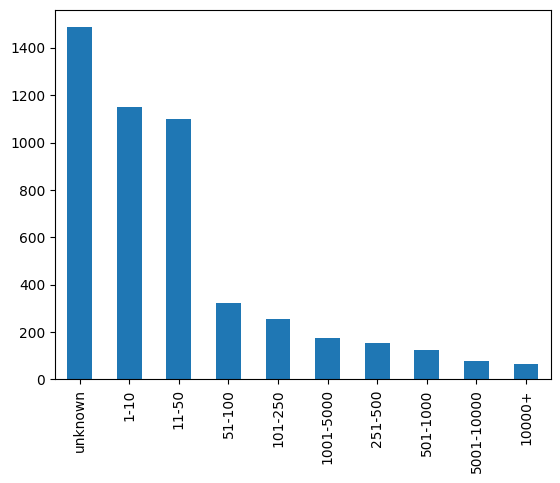

In [24]:
# plot the distribution of "employee_count"
df['employee_count'].value_counts().plot(kind='bar')

## Data Cleaning

By looking at the data, there are many columns that are unrelated to any analyses we want to run, and should be dropped. Here we will also drop records for reasons previously explored above. 

List of columns to drop, with explanation:
- uuid: irrelevant
- type: only 1 type in data ("organization") as previously determined
- permalink: irrelevant
- cb_url: irrelevant
- created/updated_at: irrelevant metadata regarding the company's crunchbase page
- legal name: irrelevant & often null
- roles: redundant, will use "primary role" to select only "company" records  
- domain: irrelevant
- region/city/country/state: will address in readme.md
- address: irrelevant/redundant
- postal: irrelevant/redundant
- closed_on: irrelevant/redundant -- we will use column "status" to determine if a company was closed
- Alias 1/2/3: irrelevant
- num_exits: irrelevant, will use "status" to determine if a company reached ipo/acquisition
- funded: irrelevant/incorrect, there are records where a company has recieved 0 total funding yet has "funded=1". I hypothesize that this is due to "funded" using num_funding_rounds as a ground truth, but there are some cases where "num_funding_rounds > 0" and "total_funding = 0". 
- total_funding: redundant, will use USD for standardization
- total_funding_currency_code: same as above

**_NOTE:_** I will also be dropping category_list (the verbose sector classification) because I find the process of codifying the different list values to be out of the scope of this coding challenge. However, this column would be a very interesting topic to review further for extensions to this model.

**_NOTE:_** short_description would also be an interesting candidate for further study, namely, applying feature engineering to the short_description in combination with NLP to extract interesting features about the description.

In [174]:
cols_to_drop = [
    'uuid', 'type', 'permalink', 'cb_url', 'created_at', 'updated_at', 'legal_name', 
    'roles', 'domain', 'region','city', 'address', 'postal_code', 'closed_on', 
    'alias1', 'alias2', 'alias3', 'num_exits', 'funded', 'total_funding', 
    "total_funding_currency_code","state_code", "category_list", "short_description","country_code"]

#drop all columns in cols_to_drop, save as a new df
df_clean = df.drop(cols_to_drop, axis=1)

As mentioned before, we need to remove large companies, companies with unknown employee counts, and schools/investment funds. Since all companies will be "organizations" after cleaning, we can drop primary_role from the data.

In [175]:
#remove rows in df_clean with "primary_role".isin([investor, school]) and employee_counts.isin(["unknown", "101-250", "251-500", "501-1000", "1001-5000", "5001-10000", "10001+"])
df_clean = df_clean[~df_clean['primary_role'].isin(['investor', 'school'])]
df_clean = df_clean.drop('primary_role', axis=1)
df_clean = df_clean[~df_clean['employee_count'].isin(['unknown', '101-250', '251-500', '501-1000', '1001-5000', '5001-10000', '10000+'])]
df_clean.head()

,name,rank,homepage_url,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url
0,Traxtuff,2892920.0,http://www.traxtuff.com,operating,Sustainability,NaN,NaN,2008-02-01,NaN,1-10,yonatan_karni@yahoo.com,972-526618778,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
1,Viridus,1637395.0,http://www.virid.us,operating,Sustainability,NaN,NaN,2007-12-31,NaN,1-10,info@virid.us,617-418-4080,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
2,Eco Logisca,2528781.0,http://diplomaticgoods.org,operating,Sustainability,NaN,NaN,2007-01-01,NaN,1-10,info@ecologisca.com,NaN,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
3,Imara Corporation,1361171.0,http://www.lioncells.com,closed,Energy,NaN,NaN,2006-01-01,NaN,1-10,nmaguire@lioncells.com,650-543-6032,http://www.facebook.com/pages/silicon-valleysa...,http://www.linkedin.com/company/san-jose-silic...,http://twitter.com/svbizjournal,https://res.cloudinary.com/crunchbase-producti...
4,EcoFlip,1975159.0,http://www.EcoFlip.org,closed,Sustainability,NaN,NaN,2008-04-20,NaN,1-10,forrestkolb@gmail.com,3107298068,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...


Some of the numerical columns have a high presence of null values, which are not allowed in the random forest model. However, these Null values are equivalent to zeroes (if a company has "null" total funding, their funding is 0). For these columns, replace null with 0

In [176]:
#convert num_cols nan to 0
num_cols = ["num_funding_rounds", "total_funding_usd"]
df_clean[num_cols] = df_clean[num_cols].fillna(0)

df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537 entries, 0 to 4910
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2537 non-null   object 
 1   rank                  2531 non-null   float64
 2   homepage_url          2475 non-null   object 
 3   status                2537 non-null   object 
 4   category_groups_list  2537 non-null   object 
 5   num_funding_rounds    2537 non-null   float64
 6   total_funding_usd     2537 non-null   float64
 7   founded_on            2204 non-null   object 
 8   last_funding_on       569 non-null    object 
 9   employee_count        2537 non-null   object 
 10  email                 1791 non-null   object 
 11  phone                 1915 non-null   object 
 12  facebook_url          1190 non-null   object 
 13  linkedin_url          1857 non-null   object 
 14  twitter_url           914 non-null    object 
 15  logo_url             

,name,rank,homepage_url,status,category_groups_list,num_funding_rounds,total_funding_usd,founded_on,last_funding_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url
0,Traxtuff,2892920.0,http://www.traxtuff.com,operating,Sustainability,0.0,0.0,2008-02-01,NaN,1-10,yonatan_karni@yahoo.com,972-526618778,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
1,Viridus,1637395.0,http://www.virid.us,operating,Sustainability,0.0,0.0,2007-12-31,NaN,1-10,info@virid.us,617-418-4080,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
2,Eco Logisca,2528781.0,http://diplomaticgoods.org,operating,Sustainability,0.0,0.0,2007-01-01,NaN,1-10,info@ecologisca.com,NaN,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...
3,Imara Corporation,1361171.0,http://www.lioncells.com,closed,Energy,0.0,0.0,2006-01-01,NaN,1-10,nmaguire@lioncells.com,650-543-6032,http://www.facebook.com/pages/silicon-valleysa...,http://www.linkedin.com/company/san-jose-silic...,http://twitter.com/svbizjournal,https://res.cloudinary.com/crunchbase-producti...
4,EcoFlip,1975159.0,http://www.EcoFlip.org,closed,Sustainability,0.0,0.0,2008-04-20,NaN,1-10,forrestkolb@gmail.com,3107298068,NaN,NaN,NaN,https://res.cloudinary.com/crunchbase-producti...


## Feature Engineering

Some of these columns are in a "gray" area w.r.t. usefulness to the model. Things like phone numbers, social media links, etc. are not useful to the model as raw data. However, their existence alone can represent something important to the model. We can concieve that a company with a well defined phone/email contact provides better customer support than a company without such contact information. Further, the company having a presence on social media could be interpreted as a positive, since their brand/product will be readily available to a curious client.

Other columns, such as "founded_on" and "last_funding_on" can be useful to the model, but will need to be recast as numbers -- here we can choose to represent these columns as durations, or time since the respective founding/funding event.


In [177]:
cols_to_bool = ["homepage_url", "twitter_url", "facebook_url", "linkedin_url", "logo_url", "email", "phone"]
df_clean[cols_to_bool] = df_clean[cols_to_bool].notnull().astype('int')

#convert "founded_on" and "last_funding_on" to datetime, then create new column "time_since_founding" and "time_since_last_funding" representing the duration between "founded_on" / "last_funding_on" and today, in days. if the original column is null the value should be 0
df_clean['founded_on'] = pd.to_datetime(df_clean['founded_on'])
df_clean['last_funding_on'] = pd.to_datetime(df_clean['last_funding_on'])
df_clean['days_since_founding'] = (pd.to_datetime('today') - df_clean['founded_on']).dt.days
df_clean['days_since_last_funding'] = (pd.to_datetime('today') - df_clean['last_funding_on']).dt.days
df_clean = df_clean.drop(['founded_on', 'last_funding_on'], axis=1)
df_clean["days_since_founding"] = df_clean['days_since_founding'].fillna(0)
df_clean["days_since_last_funding"] = df_clean['days_since_last_funding'].fillna(0)

df_clean.info()
df_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2537 entries, 0 to 4910
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2537 non-null   object 
 1   rank                     2531 non-null   float64
 2   homepage_url             2537 non-null   int64  
 3   status                   2537 non-null   object 
 4   category_groups_list     2537 non-null   object 
 5   num_funding_rounds       2537 non-null   float64
 6   total_funding_usd        2537 non-null   float64
 7   employee_count           2537 non-null   object 
 8   email                    2537 non-null   int64  
 9   phone                    2537 non-null   int64  
 10  facebook_url             2537 non-null   int64  
 11  linkedin_url             2537 non-null   int64  
 12  twitter_url              2537 non-null   int64  
 13  logo_url                 2537 non-null   int64  
 14  days_since_founding     

,name,rank,homepage_url,status,category_groups_list,num_funding_rounds,total_funding_usd,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,days_since_founding,days_since_last_funding
0,Traxtuff,2892920.0,1,operating,Sustainability,0.0,0.0,1-10,1,1,0,0,0,1,5688.0,0.0
1,Viridus,1637395.0,1,operating,Sustainability,0.0,0.0,1-10,1,1,0,0,0,1,5720.0,0.0
2,Eco Logisca,2528781.0,1,operating,Sustainability,0.0,0.0,1-10,1,0,0,0,0,1,6084.0,0.0
3,Imara Corporation,1361171.0,1,closed,Energy,0.0,0.0,1-10,1,1,1,1,1,1,6449.0,0.0
4,EcoFlip,1975159.0,1,closed,Sustainability,0.0,0.0,1-10,1,1,0,0,0,1,5609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,Macero Maceratese,NaN,1,operating,Sustainability,0.0,0.0,11-50,1,1,1,1,1,1,19963.0,0.0
4907,Azienda Agricola Allevi,NaN,1,operating,Sustainability,0.0,0.0,11-50,1,1,1,1,0,1,15215.0,0.0
4908,Gruppo Luci,NaN,1,operating,Sustainability,0.0,0.0,51-100,1,1,1,1,0,1,26538.0,0.0
4909,Ralston,NaN,1,operating,Sustainability,0.0,0.0,11-50,1,1,0,1,0,1,0.0,0.0


Now that we have our features engineered, we should drop null values from our dataset, as these now reflect truly missing data, as opposed to data that needs to have its form recast. 

The two columns that have null values are rank and country_code. While we could try imputation on rank, I believe it's overkill, as there are only 6 records with a null rank. Country code cannot be imputed.

In [178]:
df_clean = df_clean.dropna()

#convert "total_funding_usd", "rank", num_funding_rounds" to int
df_clean["total_funding_usd"] = df_clean["total_funding_usd"].astype(int)
df_clean["rank"] = df_clean["rank"].astype(int)
df_clean["num_funding_rounds"] = df_clean["num_funding_rounds"].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 4903
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2531 non-null   object 
 1   rank                     2531 non-null   int64  
 2   homepage_url             2531 non-null   int64  
 3   status                   2531 non-null   object 
 4   category_groups_list     2531 non-null   object 
 5   num_funding_rounds       2531 non-null   int64  
 6   total_funding_usd        2531 non-null   int64  
 7   employee_count           2531 non-null   object 
 8   email                    2531 non-null   int64  
 9   phone                    2531 non-null   int64  
 10  facebook_url             2531 non-null   int64  
 11  linkedin_url             2531 non-null   int64  
 12  twitter_url              2531 non-null   int64  
 13  logo_url                 2531 non-null   int64  
 14  days_since_founding     

/var/folders/bt/_wybkgqs2dqfg3t8p3_9yzvc0000gn/T/ipykernel_17335/2570633095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["total_funding_usd"] = df_clean["total_funding_usd"].astype(int)
/var/folders/bt/_wybkgqs2dqfg3t8p3_9yzvc0000gn/T/ipykernel_17335/2570633095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["rank"] = df_clean["rank"].astype(int)
/var/folders/bt/_wybkgqs2dqfg3t8p3_9yzvc0000gn/T/ipykernel_17335/2570633095.py:6: SettingWithCopyWarning: 
A value is trying to be set

## Exploratory Data Analysis
Now that our data is cleaned and feature engineered, let's do some exploratory data analysis

We can start by printing summary statistics for each of the nummerical columns

In [179]:
df_clean.describe()

,rank,homepage_url,num_funding_rounds,total_funding_usd,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,days_since_founding,days_since_last_funding
count,2.531000e+03,2531.000000,2531.000000,2.531000e+03,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,1.405841e+06,0.975504,0.338206,3.599405e+06,0.705255,0.754247,0.468589,0.731331,0.360332,0.916239,6915.157645,402.059265
std,9.114775e+05,0.154614,0.809649,3.281465e+07,0.456018,0.430618,0.499111,0.443355,0.480192,0.277084,8203.847333,1108.025393
min,3.102000e+03,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.957155e+05,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1885.000000,0.000000
50%,1.360053e+06,1.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4623.000000,0.000000
75%,2.222992e+06,1.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8641.000000,0.000000
max,2.998496e+06,1.000000,9.000000,7.701169e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60505.000000,16311.000000


We can see that total funding has huge outliers -- the 75th percentile is 0, while the average is over seven million! 

Now, lets create a pairplot to view trends between various features


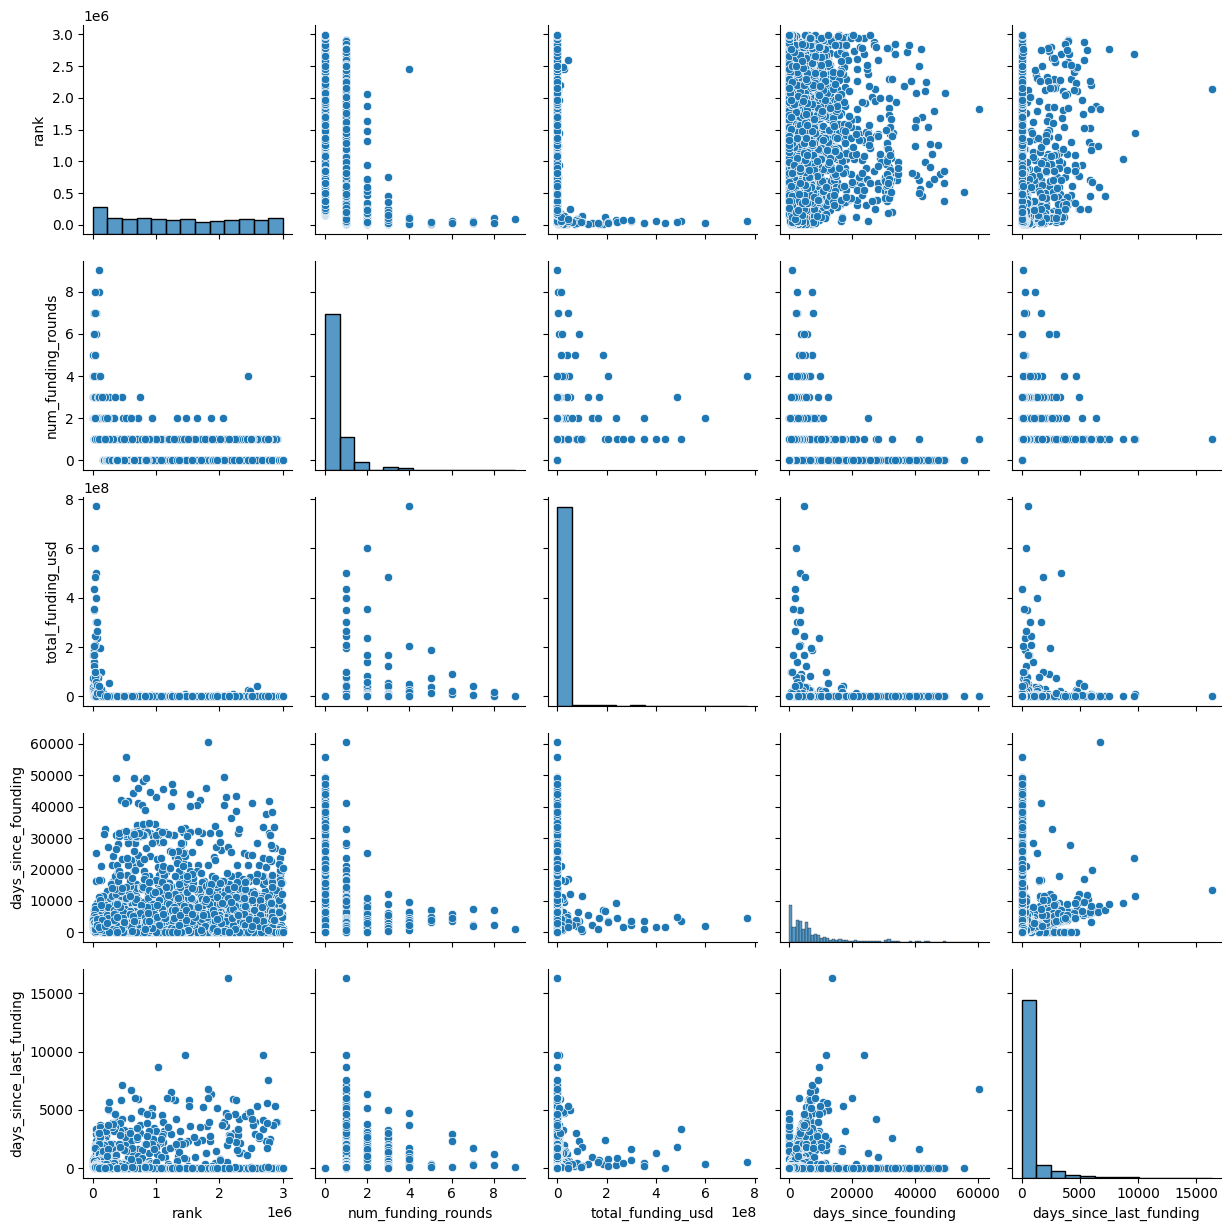

In [180]:
sns.pairplot(df_clean, vars = ["rank", "num_funding_rounds", "total_funding_usd", "days_since_founding", "days_since_last_funding"])
plt.show()

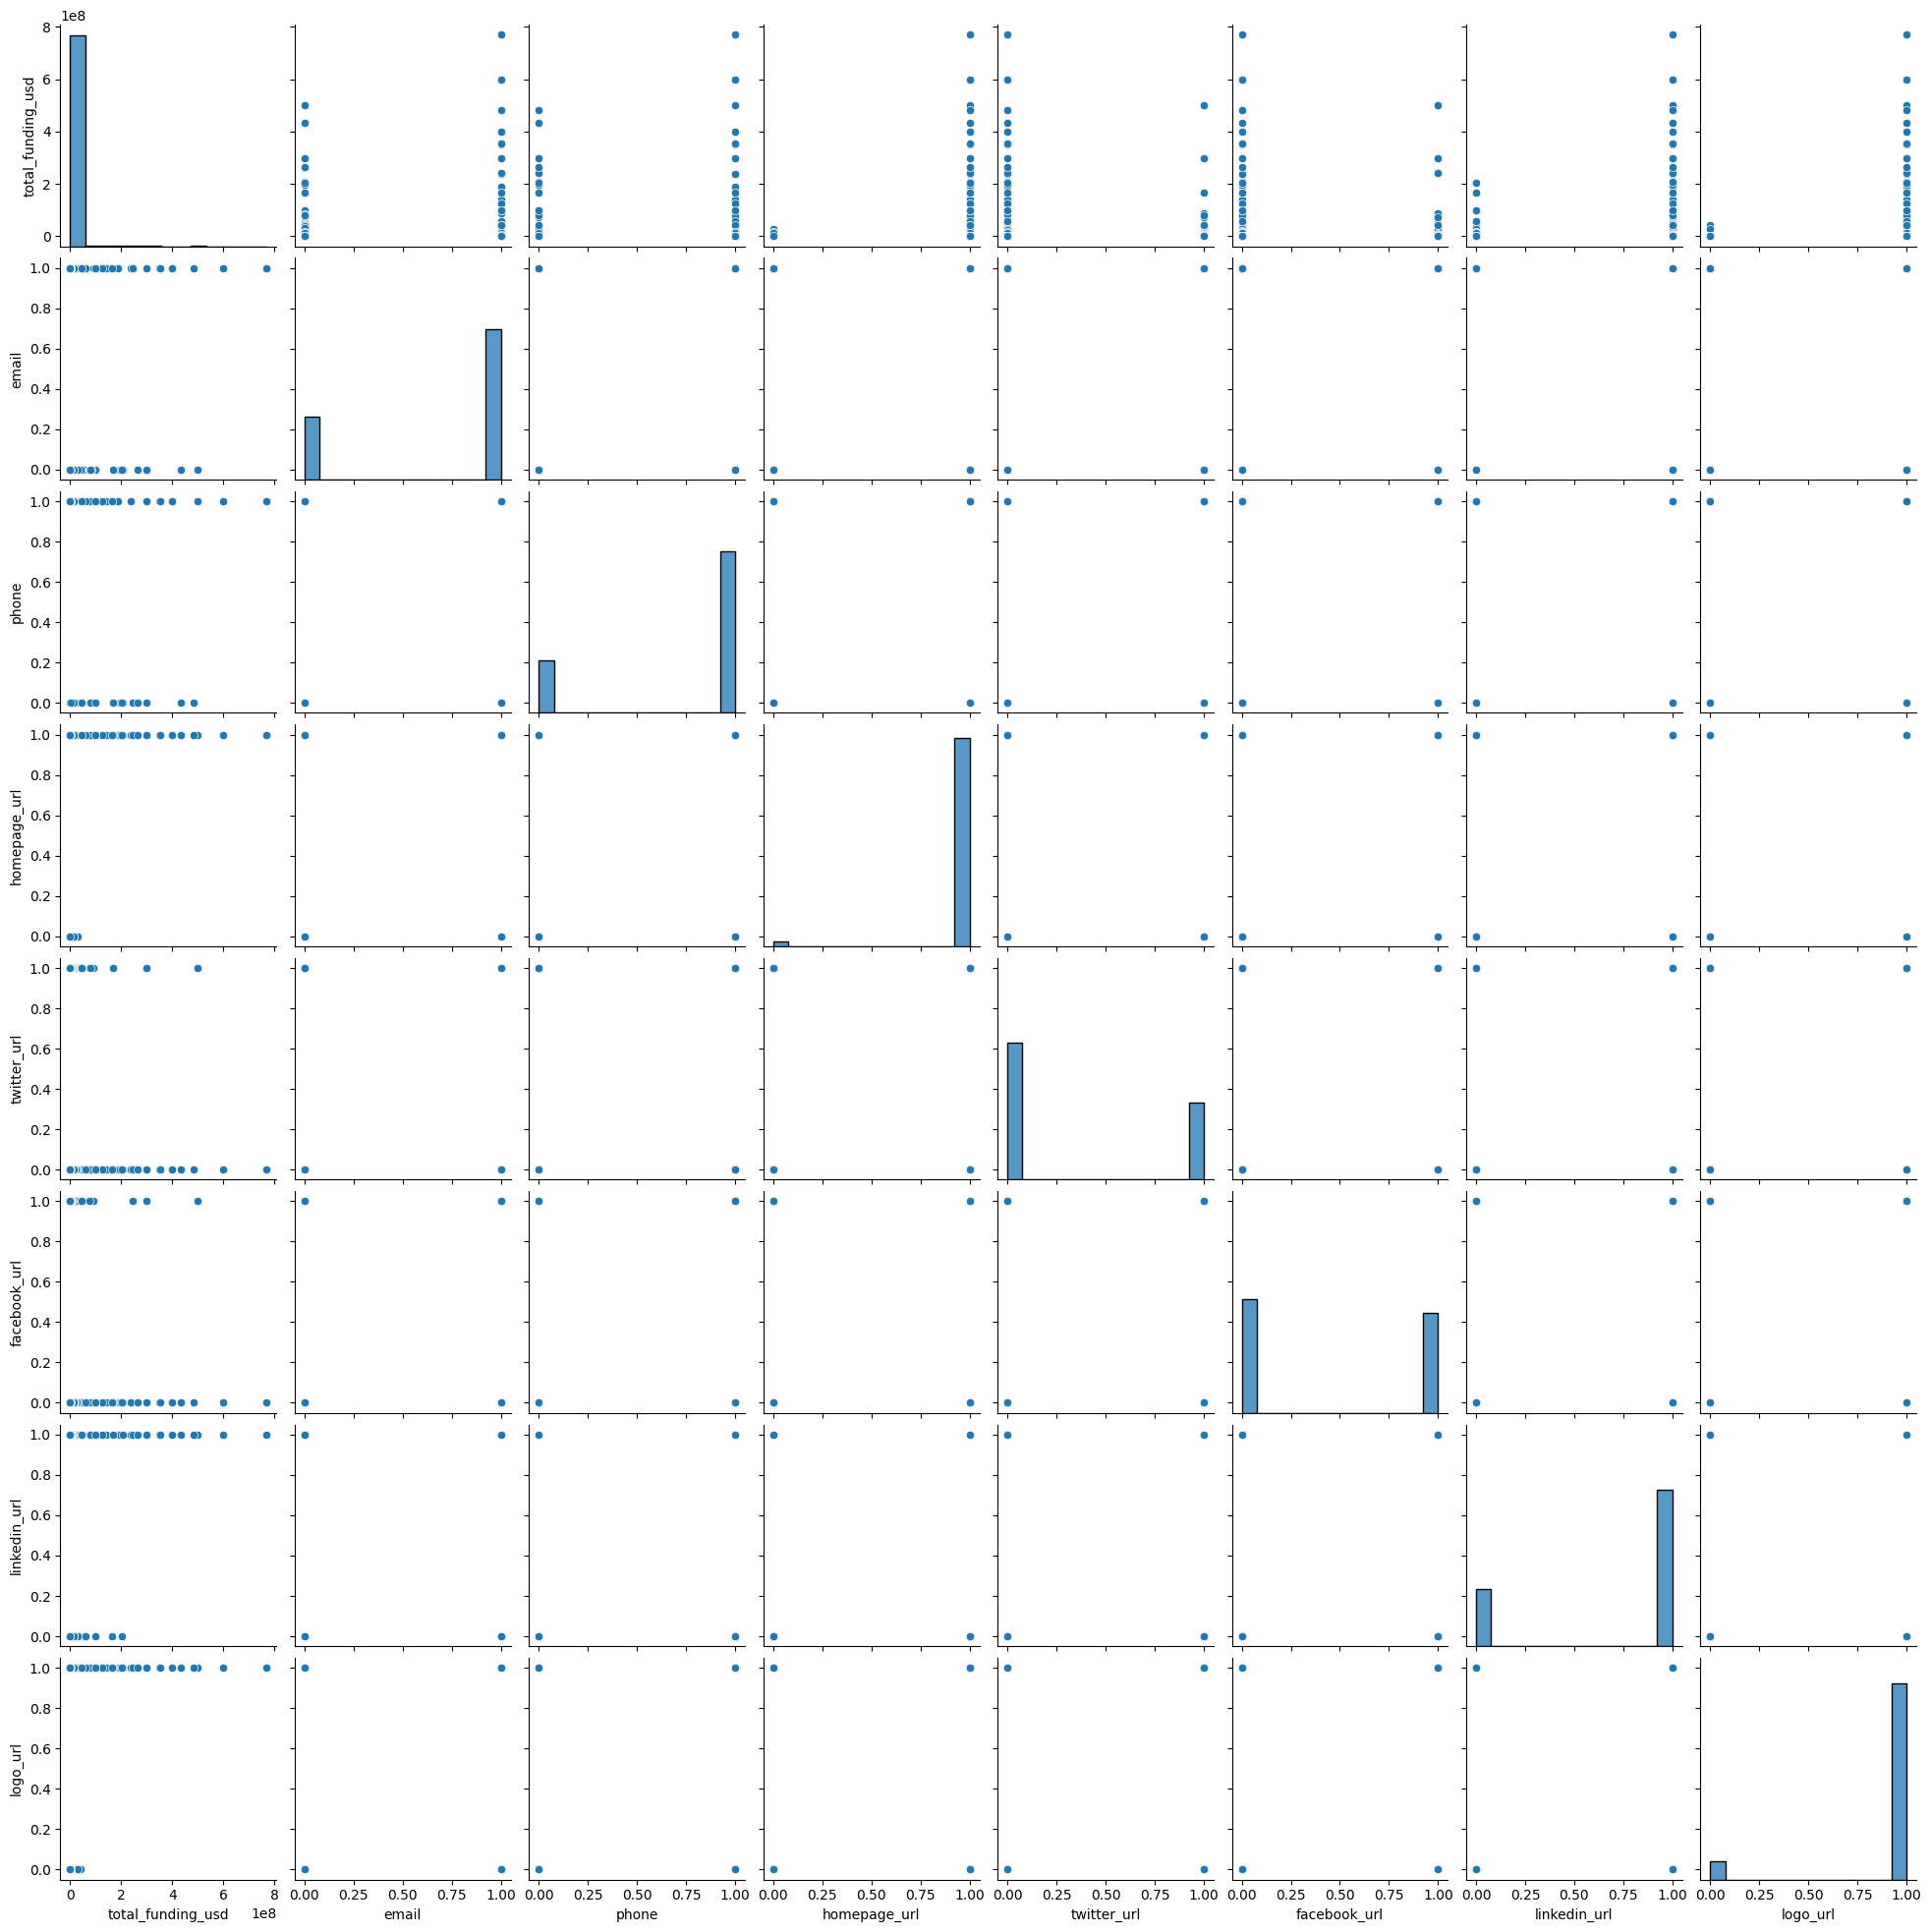

In [181]:
sns.pairplot(df_clean, vars=["total_funding_usd", "email", "phone", "homepage_url", "twitter_url", "facebook_url", "linkedin_url", "logo_url"])
plt.show()

These plots may be difficult to see, so I saved them as images to the repo

We can also plot a heatmap to check for correlations between the features. One concern could be that features with high correlations might lead to overfitting, since correlation in the variables would mean that you essentially consider the same underlying feature twice. 

/var/folders/bt/_wybkgqs2dqfg3t8p3_9yzvc0000gn/T/ipykernel_17335/571097627.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr())


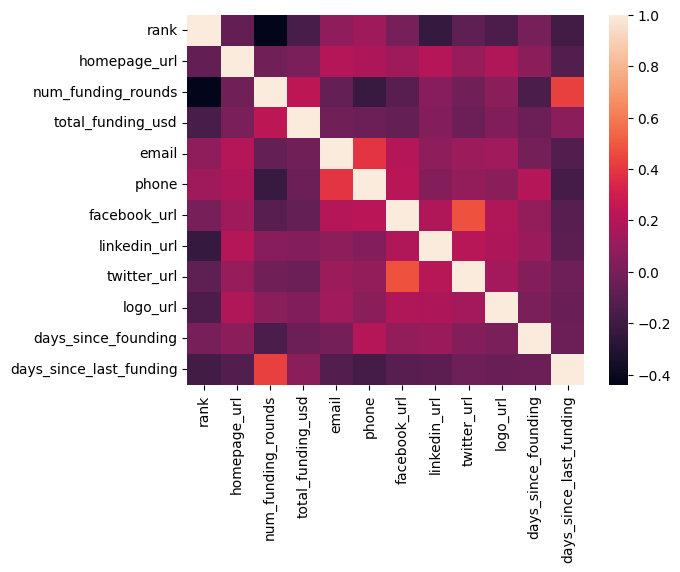

In [182]:
sns.heatmap(df_clean.corr())
plt.show()

The results of the heatmap seem to indicate little to no multicollinearity.

Finally, categorical columns like status, category_groups_list, and employee_count will need to be converted into dummy columns, where each new column is a boolean flag for the value of the old column. Since we have relatively few categories for each column, this should not degrade the performance of the model too much.  

Here we will also remove columns like "name", which may have been useful for previous EDA but will not matter to the final model.

In [183]:
df_clean = df_clean.drop(["name"], axis=1)

#convert status, category_groups_list, employee_count to dummy columns
df_clean = pd.get_dummies(df_clean, columns=["status", "category_groups_list", "employee_count"])
df_clean.info()
df_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 4903
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   rank                                 2531 non-null   int64  
 1   homepage_url                         2531 non-null   int64  
 2   num_funding_rounds                   2531 non-null   int64  
 3   total_funding_usd                    2531 non-null   int64  
 4   email                                2531 non-null   int64  
 5   phone                                2531 non-null   int64  
 6   facebook_url                         2531 non-null   int64  
 7   linkedin_url                         2531 non-null   int64  
 8   twitter_url                          2531 non-null   int64  
 9   logo_url                             2531 non-null   int64  
 10  days_since_founding                  2531 non-null   float64
 11  days_since_last_funding       

,rank,homepage_url,num_funding_rounds,total_funding_usd,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,...,days_since_last_funding,status_acquired,status_closed,status_ipo,status_operating,category_groups_list_Energy,category_groups_list_Sustainability,employee_count_1-10,employee_count_11-50,employee_count_51-100
0,2892920,1,0,0,1,1,0,0,0,1,...,0.0,0,0,0,1,0,1,1,0,0
1,1637395,1,0,0,1,1,0,0,0,1,...,0.0,0,0,0,1,0,1,1,0,0
2,2528781,1,0,0,1,0,0,0,0,1,...,0.0,0,0,0,1,0,1,1,0,0
3,1361171,1,0,0,1,1,1,1,1,1,...,0.0,0,1,0,0,1,0,1,0,0
4,1975159,1,0,0,1,1,0,0,0,1,...,0.0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,2974168,1,0,0,1,1,0,1,0,1,...,0.0,0,0,0,1,0,1,0,1,0
4900,2935661,1,0,0,1,1,0,1,0,1,...,0.0,0,0,0,1,0,1,1,0,0
4901,2974180,1,0,0,1,1,1,1,0,1,...,0.0,0,0,0,1,0,1,0,1,0
4902,2998228,1,0,0,1,1,1,0,0,1,...,0.0,0,0,0,1,0,1,0,1,0


## Export data

Our data is now cleaned. We can export it for use in the model

In [185]:
#export df_clean to csv
df_clean.to_csv('clean_data.csv', index=False)